In [1]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import pandas as pd   

In [2]:
df = pd.read_csv(r"The Data\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression()
sel = EFS(lr, max_features=4, scoring="accuracy", cv=5)

In [4]:
model = sel.fit(df.iloc[:, :4], df["species"])

c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

In [5]:
model.best_score_

0.9733333333333334

In [6]:
model.best_feature_names_

('sepal_width', 'petal_length', 'petal_width')

In [7]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [8]:
metricDf = pd.DataFrame(model.get_metric_dict()).T
metricDf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


In [9]:
import plotly.express as px
px.line(x=[str(k) for k in metricDf["feature_names"]], y=metricDf["avg_score"])

### Regression Example

In [10]:
df = pd.read_csv(r"The Data\BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(
    df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=1)

In [12]:
xTrain.shape, xTest.shape

((404, 13), (102, 13))

In [13]:
xTrain

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,376.75,10.88


In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

In [15]:
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()

print("Training", np.mean(cross_val_score(
    model, xTrain, yTrain, cv=5, scoring="r2")))
print("Testing", np.mean(cross_val_score(model, xTest, yTest, cv=5, scoring="r2")))

Training 0.7025123301096213
Testing 0.6514899901155404


In [16]:
lr = LinearRegression()
exh = EFS(lr, max_features=13, scoring="r2",
          cv=10, print_progress=True, n_jobs=-1)
sel = exh.fit(xTrain, yTrain)

Features: 8191/8191

In [17]:
sel.best_score_

0.6827988156800063

In [18]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [19]:
metricDf = pd.DataFrame(sel.get_metric_dict()).T
metricDf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.03941987916919132, 0.12695789031653215, -0....",0.129009,"(0,)",0.064226,0.086475,0.028825
1,"(1,)","[0.14236716209182754, -0.10598329567838705, 0....",0.100963,"(1,)",0.076751,0.103339,0.034446
2,"(2,)","[0.4055276765549376, 0.0029283993633670846, -0...",0.210465,"(2,)",0.139709,0.188107,0.062702
3,"(3,)","[-0.07110886674980432, -0.08269807310551558, 0...",-0.025663,"(3,)",0.055426,0.074627,0.024876
4,"(4,)","[0.18869831316675, 0.03113193162308736, 0.0348...",0.17746,"(4,)",0.114827,0.154605,0.051535
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8791441026861514, 0.576226384714265, 0.4354...",0.679213,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.096133,0.129436,0.043145
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8731761731752511, 0.5384374917854684, 0.458...",0.679018,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.098986,0.133276,0.044425
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8494627278072393, 0.5454006150975994, 0.444...",0.66547,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.099036,0.133343,0.044448
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8358451877451422, 0.5448662375728606, 0.449...",0.670075,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.094633,0.127415,0.042472


In [20]:
def adjusterR2(n, k, r2):
    return 1 - ((1-r2)*(n-1))/(n-1-k)

In [21]:
metricDf["k"] = metricDf["feature_names"].apply(lambda x: len(x))

In [22]:
metricDf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,k
0,"(0,)","[0.03941987916919132, 0.12695789031653215, -0....",0.129009,"(0,)",0.064226,0.086475,0.028825,1
1,"(1,)","[0.14236716209182754, -0.10598329567838705, 0....",0.100963,"(1,)",0.076751,0.103339,0.034446,1
2,"(2,)","[0.4055276765549376, 0.0029283993633670846, -0...",0.210465,"(2,)",0.139709,0.188107,0.062702,1
3,"(3,)","[-0.07110886674980432, -0.08269807310551558, 0...",-0.025663,"(3,)",0.055426,0.074627,0.024876,1
4,"(4,)","[0.18869831316675, 0.03113193162308736, 0.0348...",0.17746,"(4,)",0.114827,0.154605,0.051535,1
...,...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8791441026861514, 0.576226384714265, 0.4354...",0.679213,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.096133,0.129436,0.043145,12
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8731761731752511, 0.5384374917854684, 0.458...",0.679018,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.098986,0.133276,0.044425,12
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8494627278072393, 0.5454006150975994, 0.444...",0.66547,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.099036,0.133343,0.044448,12
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8358451877451422, 0.5448662375728606, 0.449...",0.670075,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.094633,0.127415,0.042472,12


In [23]:
metricDf["adjusterR2"] = adjusterR2(
    r2=metricDf["avg_score"], n=xTrain.shape[0], k=metricDf["k"])

In [24]:
metricDf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,k,adjusterR2
0,"(0,)","[0.03941987916919132, 0.12695789031653215, -0....",0.129009,"(0,)",0.064226,0.086475,0.028825,1,0.126843
1,"(1,)","[0.14236716209182754, -0.10598329567838705, 0....",0.100963,"(1,)",0.076751,0.103339,0.034446,1,0.098726
2,"(2,)","[0.4055276765549376, 0.0029283993633670846, -0...",0.210465,"(2,)",0.139709,0.188107,0.062702,1,0.208501
3,"(3,)","[-0.07110886674980432, -0.08269807310551558, 0...",-0.025663,"(3,)",0.055426,0.074627,0.024876,1,-0.028215
4,"(4,)","[0.18869831316675, 0.03113193162308736, 0.0348...",0.17746,"(4,)",0.114827,0.154605,0.051535,1,0.175414
...,...,...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8791441026861514, 0.576226384714265, 0.4354...",0.679213,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.096133,0.129436,0.043145,12,0.669368
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8731761731752511, 0.5384374917854684, 0.458...",0.679018,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.098986,0.133276,0.044425,12,0.669167
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8494627278072393, 0.5454006150975994, 0.444...",0.66547,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.099036,0.133343,0.044448,12,0.655203
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8358451877451422, 0.5448662375728606, 0.449...",0.670075,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.094633,0.127415,0.042472,12,0.659949


In [25]:
metricDf.sort_values("adjusterR2", ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,k,adjusterR2
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8855189158291968, 0.5742220049707852, 0.437...",0.682799,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.096995,0.130595,0.043532,10,0.674728
7408,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.8717831363927702, 0.5819307800982585, 0.462...",0.680483,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.090811,0.122269,0.040756,9,0.673185
8141,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8792702841985806, 0.5752245789381261, 0.438...",0.681125,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.096068,0.129348,0.043116,11,0.672177
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8734082301119797, 0.538138251576179, 0.4610...",0.680994,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.098795,0.133019,0.04434,11,0.672043
8153,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8853169531726776, 0.5751761822045902, 0.434...",0.680914,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.097075,0.130703,0.043568,11,0.67196
...,...,...,...,...,...,...,...,...,...
53,"(3, 11)","[0.07227421305699011, -0.026141441832760126, 0...",0.073485,"(3, 11)",0.069934,0.09416,0.031387,2,0.068864
11,"(11,)","[0.1200629474726852, 0.03143835749752166, -0.0...",0.068712,"(11,)",0.071116,0.095752,0.031917,1,0.066396
49,"(3, 7)","[-0.0371219722713414, -0.1671760395427997, 0.0...",0.057453,"(3, 7)",0.09446,0.127183,0.042394,2,0.052752
7,"(7,)","[0.004822573124353857, -0.09518844023749029, -...",0.038815,"(7,)",0.066813,0.089958,0.029986,1,0.036424


In [26]:
xTrainSel = sel.transform(xTrain)
xTestSel = sel.transform(xTest)

In [27]:
model = LinearRegression()

print("Training", np.mean(cross_val_score(
    model, xTrainSel, yTrain, cv=5, scoring="r2")))
print("Testing", np.mean(cross_val_score(
    model, xTestSel, yTest, cv=5, scoring="r2")))

Training 0.7100327839218562
Testing 0.7205819296124483


### Sequential Backward Elimination

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error

data = pd.read_csv(r"The Data\BostonHousing.csv")
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [30]:
xTrain, xTest, yTrain, yTest = train_test_split(
    df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=1)

In [31]:
xTrain.shape, xTest.shape

((404, 13), (102, 13))

In [32]:
sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

In [33]:
model = LinearRegression()

In [34]:
print("Training", np.mean(cross_val_score(
    model, xTrain, yTrain, cv=5, scoring="r2")))
print("Testing", np.mean(cross_val_score(model, xTest, yTest, cv=5, scoring="r2")))

Training 0.7025123301096213
Testing 0.6514899901155404


In [35]:
sfs = SFS(LinearRegression(), k_features="best", forward=False,
          floating=False, scoring="r2", n_jobs=-1)
sfs.fit(xTrain, yTrain)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), n_jobs=-1, scoring='r2')

In [36]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [37]:
metricDf = pd.DataFrame(sfs.get_metric_dict()).T
metricDf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817178, 0.6920238509138777, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710695, 0.6944570477695307, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.754710892556849, 0.6959627893665097, 0.7017...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711025, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069
8,"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800458, 0.6822126526818693, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992
7,"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750725, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009
6,"(1, 4, 5, 7, 10, 12)","[0.7519120213497091, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224
5,"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504306, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931
4,"(5, 7, 10, 12)","[0.7384743962575444, 0.640118850766883, 0.5873...",0.662544,"(5, 7, 10, 12)",0.063384,0.049315,0.024658


In [38]:
metricDf["k"] = metricDf["feature_names"].apply(lambda x: len(x))
metricDf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,k
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817178, 0.6920238509138777, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863,13
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710695, 0.6944570477695307, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865,12
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.754710892556849, 0.6959627893665097, 0.7017...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758,11
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,10
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711025, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069,9
8,"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800458, 0.6822126526818693, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992,8
7,"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750725, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009,7
6,"(1, 4, 5, 7, 10, 12)","[0.7519120213497091, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224,6
5,"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504306, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931,5
4,"(5, 7, 10, 12)","[0.7384743962575444, 0.640118850766883, 0.5873...",0.662544,"(5, 7, 10, 12)",0.063384,0.049315,0.024658,4


In [39]:
metricDf["AdjustedR2"] = adjusterR2(
    r2=metricDf["avg_score"], n=xTrain.shape[0], k=metricDf["k"])
metricDf.sort_values("AdjustedR2", ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,k,AdjustedR2
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,10,0.702654
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.754710892556849, 0.6959627893665097, 0.7017...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758,11,0.699918
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711025, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069,9,0.69757
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710695, 0.6944570477695307, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865,12,0.696781
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817178, 0.6920238509138777, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863,13,0.692596
8,"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800458, 0.6822126526818693, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992,8,0.691605
7,"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750725, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009,7,0.686794
6,"(1, 4, 5, 7, 10, 12)","[0.7519120213497091, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224,6,0.681258
5,"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504306, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931,5,0.677058
4,"(5, 7, 10, 12)","[0.7384743962575444, 0.640118850766883, 0.5873...",0.662544,"(5, 7, 10, 12)",0.063384,0.049315,0.024658,4,0.659161


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

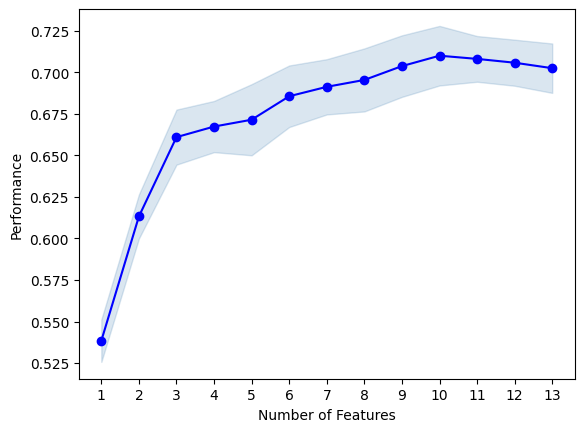

In [58]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs.get_metric_dict(), kind="std_err")

In [41]:
import plotly.graph_objects as go
px.line(x=metricDf["k"], y=metricDf["AdjustedR2"]).add_traces(
    go.Scatter(x=metricDf["k"], y=metricDf["AdjustedR2"]))

In [42]:
xTrainSel = sfs.transform(xTrain)
xTestSel = sfs.transform(xTest)

In [43]:
xTrainSel.shape, xTestSel.shape

((404, 10), (102, 10))

In [44]:
print("Training", np.mean(cross_val_score(
    LinearRegression(), xTrainSel, yTrain, cv=5, scoring="r2")))
print("Testing", np.mean(cross_val_score(
    LinearRegression(), xTestSel, yTest, cv=5, scoring="r2")))

Training 0.7100327839218562
Testing 0.7205819296124483


### Sequential Forward Selection

In [45]:
xTrain, xTest, yTrain, yTest = train_test_split(
    df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=1)

In [46]:
xTrain.shape, xTest.shape

((404, 13), (102, 13))

In [47]:
sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

In [48]:

print("Training", np.mean(cross_val_score(
    LinearRegression(), xTrain, yTrain, cv=5, scoring="r2")))
print("Testing", np.mean(cross_val_score(
    LinearRegression(), xTest, yTest, cv=5, scoring="r2")))

Training 0.7025123301096213
Testing 0.6514899901155404


In [49]:
sfs = SFS(LinearRegression(), k_features="best", forward=True,
          floating=False, scoring="r2", n_jobs=-1)
sfs.fit(xTrain, yTrain)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          n_jobs=-1, scoring='r2')

In [50]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [51]:
metricDf = pd.DataFrame(sfs.get_metric_dict()).T
metricDf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742
2,"(5, 12)","[0.6330856272904802, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252
3,"(5, 10, 12)","[0.7215896884753017, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568
4,"(5, 10, 11, 12)","[0.725877216548624, 0.6342604286872173, 0.6558...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541
5,"(5, 7, 10, 11, 12)","[0.7440756174774326, 0.6473449858158777, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527
7,"(1, 4, 5, 7, 10, 11, 12)","[0.7548843433907461, 0.6798073590310516, 0.662...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205138, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924


In [52]:
metricDf["k"] = metricDf["feature_names"].apply(lambda x: len(x))
metricDf

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,k
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742,1
2,"(5, 12)","[0.6330856272904802, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252,2
3,"(5, 10, 12)","[0.7215896884753017, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568,3
4,"(5, 10, 11, 12)","[0.725877216548624, 0.6342604286872173, 0.6558...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541,4
5,"(5, 7, 10, 11, 12)","[0.7440756174774326, 0.6473449858158777, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418,5
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527,6
7,"(1, 4, 5, 7, 10, 11, 12)","[0.7548843433907461, 0.6798073590310516, 0.662...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635,7
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205138, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974,8
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525,9
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,10


In [53]:
metricDf["AdjustedR2"] = adjusterR2(
    r2=metricDf["avg_score"], n=xTrain.shape[0], k=metricDf["k"])
metricDf.sort_values("AdjustedR2", ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,k,AdjustedR2
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,10,0.702654
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.754710892556849, 0.6959627893665097, 0.7017...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758,11,0.699918
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525,9,0.696996
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710695, 0.6944570477695307, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865,12,0.696781
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817178, 0.6920238509138777, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863,13,0.692596
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205138, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974,8,0.689274
7,"(1, 4, 5, 7, 10, 11, 12)","[0.7548843433907461, 0.6798073590310516, 0.662...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635,7,0.685844
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527,6,0.680869
5,"(5, 7, 10, 11, 12)","[0.7440756174774326, 0.6473449858158777, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418,5,0.667369
4,"(5, 10, 11, 12)","[0.725877216548624, 0.6342604286872173, 0.6558...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541,4,0.664048


In [54]:
xTrainSel = sfs.transform(xTrain)
xTestSel = sfs.transform(xTest)

In [55]:
print("Training", cross_val_score(LinearRegression(),
      xTrainSel, yTrain, cv=5, scoring="r2").mean())
print("Testing", cross_val_score(LinearRegression(),
      xTestSel, yTest, cv=5, scoring="r2").mean())

Training 0.7100327839218562
Testing 0.7205819296124483


# End